In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

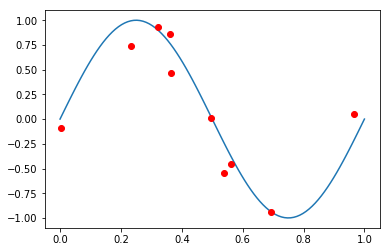

In [17]:
#Generación de observaciones aleatorias a partir de la función seno
np.random.seed(257915)
pi= np.pi
x = np.linspace(0,1,100) 
y = np.sin(2*pi*x)
plt.plot(x,y, label=r'$f(x)=\sin(x)$')


x1=np.sort(np.random.rand(10))
y1=np.sin(2*pi*x1)


noise = np.random.uniform(-0.3, 0.3, x1.shape)
ys= y1 + noise   # start,stop,step

plt.plot(x1,ys,'ro')


# Polinomial Curve Fitting

Se ajustarán los datos usando una función polinomial de la forma:

$$y(x,\boldsymbol{w}) = w_0 + w_1x + w_2x^2+ . . . + w_M x^M = \sum_{j=0}^M w_jx^j$$

Donde M es el orden del polinomio y $w=[w_0,\cdots,w_M]$ son los coeficientes del polinomio.

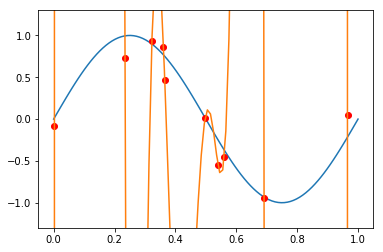

In [4]:
poly0 = np.poly1d(np.polyfit(x1,ys,9))
xp = np.linspace(0, 1, 100)

plt.plot(x,y)
plt.plot(x1,ys,'ro')
plt.ylim(-1.3,1.3)
plt.plot(xp,poly0(xp))
plt.show()

Text(0.5, 0.98, 'Polynomial Curve Fitting')

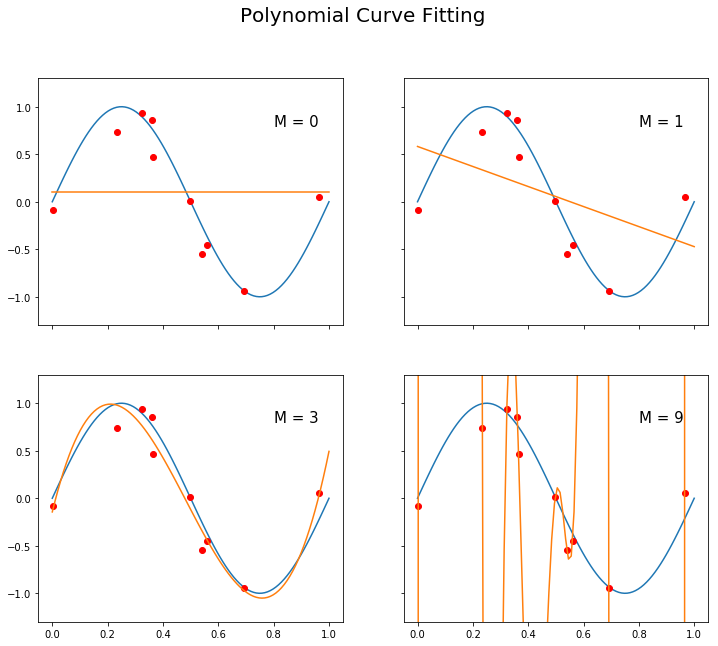

In [5]:
fig, ax = plt.subplots( 2, 2 ,sharex = True, sharey = True, figsize=(12,10))

poly00 = np.poly1d(np.polyfit(x1,ys,0))
ax[0,0].plot(x,y)
ax[0,0].plot(x1,ys,"ro")
ax[0,0].set_ylim(-1.3,1.3)                 
ax[0,0].plot(xp,poly00(xp))
ax[0,0].text(0.8,0.8,"M = 0",fontsize=15)

poly01 = np.poly1d(np.polyfit(x1,ys,1))
ax[0,1].plot(x,y)
ax[0,1].plot(x1,ys,"ro")
ax[0,1].set_ylim(-1.3,1.3)   
ax[0,1].plot(xp,poly01(xp))
ax[0,1].text(0.8,0.8,"M = 1",fontsize=15)
                   
poly10 = np.poly1d(np.polyfit(x1,ys,3))
ax[1,0].plot(x,y)
ax[1,0].plot(x1,ys,"ro")
ax[1,0].set_ylim(-1.3,1.3)    
ax[1,0].plot(xp,poly10(xp))
ax[1,0].text(0.8,0.8,"M = 3",fontsize=15)

poly11 = np.poly1d(np.polyfit(x1,ys,9))
ax[1,1].plot(x,y)
ax[1,1].plot(x1,ys,"ro")
ax[1,1].set_ylim(-1.3,1.3) 
ax[1,1].plot(xp,poly11(xp))
ax[1,1].text(0.8,0.8,"M = 9",fontsize=15)

fig.suptitle("Polynomial Curve Fitting",fontsize=20)


# Determinando los valores w

Los coeficientes del polinomio pueden ser determinados ajustando el polinomio a los datos de entrenamiento. Mediante la minimización de la función de error que mide el desajuste entre la funcion $y(x,w)$ para un valor dado de $w$ y el conjunto de entrenamiento. Tomando la función de error como la sumas de los errores al cuadrado se tiene: 


$$E(w) = \frac{1}{2} \sum_{n=1}^{N} [{y(x_n,\boldsymbol{w}) − t_n}]^2$$


In [6]:
def sse(w) :
    si=0
    
    for i in range(10):
        x=x1[i]
        t=ys[i]
        xi=np.zeros(len(w))
        for j in range(len(w)):
            xi[j]=pow(x,j)
        si= 1/2*pow(np.dot(xi,w)-t,2)+ si
    return si  
        
            
    

Se puede solucionar el problema de ajuste escogiendo el valor w para el cual $E(w)$ sea el menor. Y dado que la función de error es cuadratica en los coeficientes w, su minimización con respecto a estos tiene una solución única $w*$. Asi el polinomio resultante sera $y(x,w*)$

In [7]:
from scipy.optimize import minimize

x0 = np.array([0,0,0,0])
res = minimize(sse, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.110912
         Iterations: 361
         Function evaluations: 640


In [9]:
print(res.x)

[ -0.1437961   11.8837162  -36.07984737  24.83316545]


En las siguientes lineas se encontrarán los Ws optimos para cada caso (cada grado polinomial) 

In [10]:

W=[]

for i in range(10):
    x0= np.zeros(i+1)
    res = minimize(sse, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': False})
    W.append(res.x) 

#Se gurdan los ws en un arreglo de arreglos.
    


In [38]:
df = pd.DataFrame(W,columns=['$w_0$','$w_1$','$w_2$','$w_3$','$w_4$','$w_5$','$w_6$','$w_7$','$w_8$','$w_9$'])
df

,$w_0$,$w_1$,$w_2$,$w_3$,$w_4$,$w_5$,$w_6$,$w_7$,$w_8$,$w_9$
0,0.103194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.581792,-1.054116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.528384,-0.755393,-0.306014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.143796,11.883716,-36.079847,24.833165,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.140450,11.931109,-36.440158,25.498132,-0.357061,NaN,NaN,NaN,NaN,NaN
5,-0.126290,10.463985,-29.167878,16.125185,-0.647968,3.959120,NaN,NaN,NaN,NaN
6,-0.048175,3.809970,5.529771,-32.634552,-12.342564,67.152460,-30.798449,NaN,NaN,NaN
7,-0.131524,10.345227,-26.868420,7.062228,9.181948,10.395984,-16.397512,6.994782,NaN,NaN
8,0.000672,5.334469,-8.050744,-5.812129,0.151265,0.337197,7.261505,-5.153339,7.146947,NaN
9,-0.130369,8.130263,-12.073203,-20.911566,20.294041,7.923541,6.396076,-4.803195,10.462162,-15.357132


In [12]:
def X(x,W) :
    X=np.zeros(len(W))
    for i in range(len(W)) :
        X[i]=pow(x,i)
    return X      

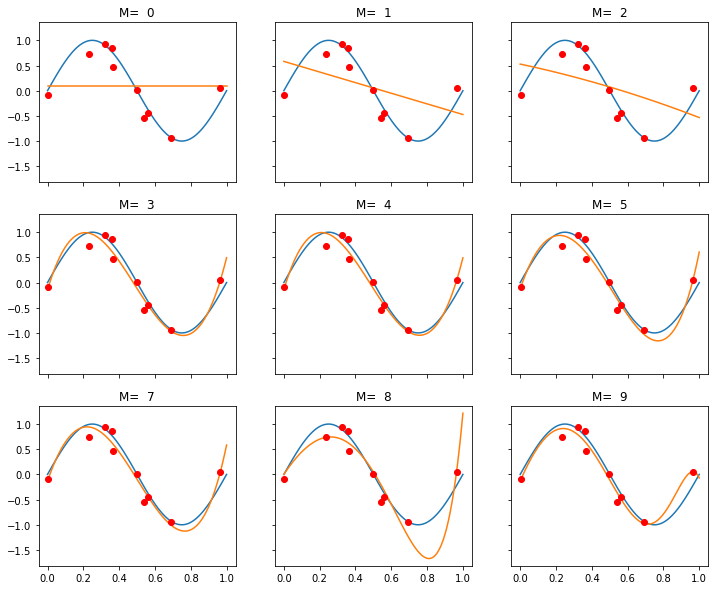

In [21]:
fig, ax = plt.subplots( 3, 3 ,sharex = True, sharey = True, figsize=(12,10))

for k in range(3):
    for j in range(3):  
        n=pow(2,k)+j+2*k-1 #---> para producir la secuencia 012345789
        x11=np.linspace(0,1,100)
        y11=np.zeros(100)
        for i in range(len(y11)):
            y11[i]=np.dot(W[n],X(x11[i],W[n]))
        ax[k,j].plot(x,y)  
        ax[k,j].plot(x11,y11)
        ax[k,j].plot(x1,ys,'ro')
        ax[k,j].set_title("M={:3.0f}".format(n)) #--> titulo de cada subplot    

## Comparing the models: root mean square error

Para comparar los distintos modelos se calculará la raiz del error cuadrtico medio como :

$$E_{RMS} = \sqrt{2E(\boldsymbol{w}^*)/N }$$ 

In [24]:
Erms=np.zeros(10)
for i in range(10):
    x0= np.zeros(i+1)
    res = minimize(sse, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': False})
    Erms[i]=math.sqrt(2*sse(res.x)/10)
#print(Erms)    

In [59]:
# nuevas observaciones de x
np.random.seed(1234)
x21=np.sort(np.random.rand(10))
y21=np.sin(2*pi*x1)
noise2 = np.random.normal(0,0.3, x1.shape)
ys2= y21 + noise2   # start,stop,step

#Caluculamos e Erms de los predictores de las nuevas obs.


def sse1(w) :
    si=0
    
    for i in range(10):
        x=x21[i]
        t=ys2[i]
        xi=np.zeros(len(w))
        for j in range(len(w)):
            xi[j]=pow(x,j)
        si= 1/2*pow(np.dot(xi,w)-t,2)+ si
    return si  
        

Erms1=np.zeros(10)
for i in range(10):
    Erms1[i]=math.sqrt(2*sse1(W[i])/10)
    
   

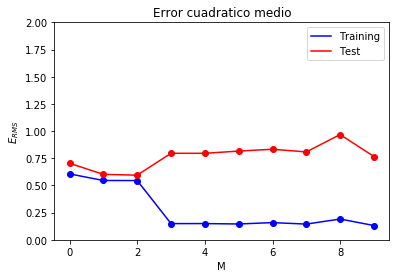

In [60]:
M=np.array([0,1,2,3,4,5,6,7,8,9])


plt.figure()
plt.plot(M,Erms,'b',label='Training')
plt.plot(M,Erms1,'r',label='Test')
plt.plot(M,Erms,'bo')
plt.plot(M,Erms1,'ro')
plt.ylim(0,2)
plt.xlabel('M')
plt.ylabel('$E_{RMS}$')
plt.legend(loc='best')
plt.title('Error cuadratico medio')
plt.show()


## Regularización 

Está tecnica es usada oara controlar el problema de sobreajuste penalizandor el termino de error asi:

$$\widetilde{E}(\boldsymbol{w})  = \frac{1}{2} \sum_{n=1}^{N}[y(x_n,\boldsymbol{w}) − t_n]^2 +  \frac{λ}{2} ||\boldsymbol{w} ||^2$$

In [40]:
def rse(wl) :
    si=0
    n=len(wl)-1
    w=wl[:n]
    l=wl[n]
    for i in range(10):
        x=x1[i]
        t=ys[i]
        xi=np.zeros(len(w))
        for j in range(len(w)):
            xi[j]=pow(x,j)
        si= 1/2*pow(np.dot(xi,w)-t,2)+ si
    ew= si + l/2*np.dot(w,w)    
    return ew  


In [43]:
from scipy.optimize import minimize

x00 = np.array([0,0,0,0,0,0,0,0,0,0,0])
res1 = minimize(rse, x00, method='CG',
               options={ 'disp': True})
print(res1.x)

Optimization terminated successfully.
         Current function value: -76499834166650675023314944.000000
         Iterations: 4
         Function evaluations: 286
         Gradient evaluations: 22
[ 2.91509393e+08 -2.74304356e+08 -2.92052304e+08 -1.20336837e+08
  4.06755370e+07  1.55877906e+08  2.30376331e+08  2.75570534e+08
  3.01118043e+08  3.13864398e+08 -2.53250400e+08]


In [54]:
Wr=[]

for i in range(10):
    x0= np.zeros(i)
    res1 = minimize(rse, x0, method='CG',
               options={'xtol': 1e-8, 'disp': False})
    Wr.append(res1.x) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: OptimizeWarning: Unknown solver options: xtol
  


IndexError: index -1 is out of bounds for axis 0 with size 0

In [52]:
df1=pd.DataFrame(Wr)
df1

,0,1,2,3,4,5,6,7,8,9
0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.444116e+08,-1.248931e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.445967e+08,-3.178864e+08,-2.756277e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.464008e+08,-7.398946e+08,-7.325504e+08,-2.306286e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,1.043881e+09,-1.158370e+09,-1.135847e+09,-1.505405e+08,-1.130618e+09,NaN,NaN,NaN,NaN,NaN
5,-5.408026e+07,-8.221189e+08,-5.563825e+08,2.645791e+08,9.587150e+08,-9.407438e+08,NaN,NaN,NaN,NaN
6,1.566216e+08,-2.824255e+08,-2.634884e+08,-7.462494e+07,9.447827e+07,2.132313e+08,-2.063583e+08,NaN,NaN,NaN
7,5.059958e+07,-4.420488e+08,-3.365297e+08,7.025411e+07,4.199045e+08,6.600483e+08,8.094003e+08,-6.376948e+08,NaN,NaN
8,7.242939e+08,-1.343240e+09,-1.269563e+09,-4.821717e+08,2.252275e+08,7.240545e+08,1.043935e+09,1.236564e+09,-5.130595e+08,NaN
9,6.662621e+08,-1.191896e+09,-1.160455e+09,-5.237779e+08,5.490962e+07,4.656936e+08,7.310724e+08,8.926609e+08,9.849243e+08,-3.805214e+08


8